# ДЗ 03. TensorFlow
### Введение в искусственные нейронные сети

1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.
3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [173]:
import tensorflow as tf
import time
msg = tf.constant(f'TensorFlow {tf.__version__} Hello World')
tf.print(msg)

TensorFlow 2.3.0 Hello World


In [65]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [62]:
from tensorflow.python import debug as tf_debug

## Задание 1

In [77]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# нормализация данных
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
# параметры для создания моделей и проверки их результативности, а также изучения взаимного влияния параметров друг на друга
layer1 = [16,64,256] # кол-во нейронов в слое
activation_func = ['relu', 'sigmoid', 'softmax']
batches = [16,64,128,256]
epochs = [3,10,20]

In [74]:
%%time
# организуем цикл с перебором параметров, займёт два часа!
counter = 1
results =[]
for neuro_qty in layer1:
    for func in activation_func:
        for epoch_qty in epochs:
            for batch_qty in batches:
                
                start_time = time.time()
                
                # Build the model
                model = keras.Sequential([
                keras.layers.Flatten(input_shape=(28, 28)),
                keras.layers.Dense(neuro_qty, activation=func),
                keras.layers.Dense(10)])
                
                # Compile the model
                model.compile(optimizer='adam',
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                              metrics=['accuracy'])
                
                with tf.device('/device:GPU:0'):
                    # Train the model
                    model.fit(train_images, train_labels, epochs=epoch_qty, verbose=0)


                
                # Evaluate the model.
                test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
                execution_time = time.time()-start_time
                item = {'counter':counter, '1st_layer_qty':neuro_qty, 'epochs':epoch_qty,
                        'batch_qty':batch_qty, 'acc':test_acc, 'loss':test_loss, 'function':func, 'time':execution_time}
                
                print(item)
                results.append(item)
                counter +=1                

{'counter': 1, '1st_layer_qty': 16, 'epochs': 3, 'batch_qty': 16, 'acc': 0.843500018119812, 'loss': 0.4412183165550232, 'function': 'relu', 'time': 6.5608971118927}
{'counter': 2, '1st_layer_qty': 16, 'epochs': 3, 'batch_qty': 64, 'acc': 0.8435999751091003, 'loss': 0.453762948513031, 'function': 'relu', 'time': 5.586278200149536}
{'counter': 3, '1st_layer_qty': 16, 'epochs': 3, 'batch_qty': 128, 'acc': 0.8446999788284302, 'loss': 0.4432164132595062, 'function': 'relu', 'time': 5.659309148788452}
{'counter': 4, '1st_layer_qty': 16, 'epochs': 3, 'batch_qty': 256, 'acc': 0.8446999788284302, 'loss': 0.4357958137989044, 'function': 'relu', 'time': 5.567806959152222}
{'counter': 5, '1st_layer_qty': 16, 'epochs': 10, 'batch_qty': 16, 'acc': 0.8561999797821045, 'loss': 0.40354374051094055, 'function': 'relu', 'time': 18.559951305389404}
{'counter': 6, '1st_layer_qty': 16, 'epochs': 10, 'batch_qty': 64, 'acc': 0.8500000238418579, 'loss': 0.42118921875953674, 'function': 'relu', 'time': 16.86505

KeyboardInterrupt: 

In [23]:
# создаём датафрейм из результатов
import pandas as pd
results_df = pd.DataFrame(results)
results_df.drop(columns="counter", inplace = True)
results_df.sort_values('acc', ascending=False, inplace=True)

In [27]:
results_df.to_csv('network_results.csv', sep=';')
results_df.head()

,1st_layer_qty,epochs,batch_qty,acc,loss,function,time
83,256,20,256,0.8966,0.334635,relu,177.418880
94,256,20,128,0.8948,0.314413,sigmoid,171.579499
82,256,20,128,0.8946,0.355983,relu,185.547594
81,256,20,64,0.8922,0.359649,relu,229.029497
93,256,20,64,0.8913,0.317302,sigmoid,143.233299


In [28]:
# попробуем визуализировать взаимосвязи данных между собой
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing

In [34]:
# запоминаем названия столбцов перед нормализацией
cols = ['1st_layer_qty','epochs','batch_qty','acc', 'loss', 'time']

In [39]:
new_df = results_df.copy()
new_df = new_df[cols]
new_df.head(2)

,1st_layer_qty,epochs,batch_qty,acc,loss,time
83,256,20,256,0.8966,0.334635,177.418880
94,256,20,128,0.8948,0.314413,171.579499


In [40]:
# делаем нормализацию
x = new_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = cols)

In [41]:
# создаём вектора для отображения на графике
accuracy_vector = df['acc']
layer1_v = df['1st_layer_qty']
epochs_v = df['epochs']
batch_v = df['batch_qty']
time_v = df['time']
time_v = df['loss']

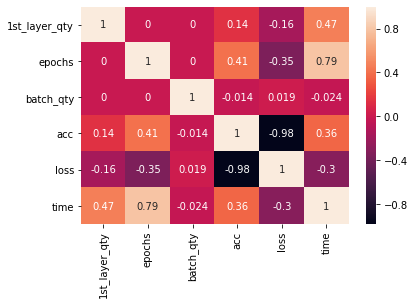

In [42]:
# построим тепловую карту
corrMatrix = results_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [102]:
# посмотрим, как влияет функция активации на результаты модели:
table = pd.pivot_table(results_df, index=['function'], aggfunc=np.mean)
table

,1st_layer_qty,acc,batch_qty,epochs,loss,time
function,,,,,,
relu,112,0.867719,116,11,0.381774,67.990797
sigmoid,112,0.868506,116,11,0.370211,64.976948
softmax,112,0.779589,116,11,0.594653,74.794540


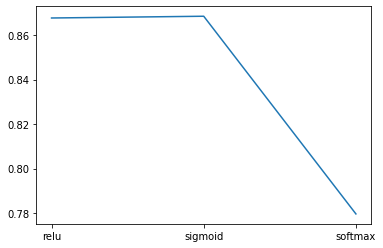

In [104]:
# влияние функции активации на точность:
plt.plot(table.index,table['acc'])

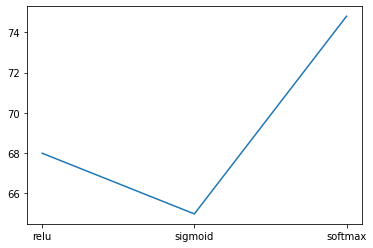

In [105]:
# влияние функции активации на длительность расчётов:
plt.plot(table.index,table['time'])

### Итоги и выводы:

* Чтобы понять, какие параметры следует менять для улучшения точности, была построена тепловая матрица (корреляционная матрица параметров), чтобы оценить влияние разных параметров на точность
* Очевидно, что точность модели находится в зависимости от параметров "кол-во эпох" (в большей степени), "кол-во нейронов слоя" (в меньшей степени), "размер батча" 
* Точность модели удалось чуть улучшить (с 86% до почти 90%) за счёт применения большего кол-ва эпох и/или большего кол-ва нейронов 
* Тест активационных функций показывает, что "softmax" менее эффективная функция: требует большее время при более низкой точности, а при выборе между "relu", "sigmoid" предпочтение, возможно, даже имеет смысл отдать сигмоиде, т.к. она показала гораздо меньшее время, требуемое для расчёта (удивительно, но на этих данных и с этой моделью дело обстоит именно так, хотя "теория" говорит в пользу "relu") 

## Задание 2

Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке

Пытаясь настроить расчёты на GPU, мне пришлось использовать дебаг-логгирование. Сейчас лог-сообщения перестали отображаться, но поначалу всё было хорошо, и я мог видеть, на каком устройстве обрабатывается моя задача, это было очень удобно:

In [211]:
tf.debugging.set_log_device_placement(True)
#tf.compat.v1.debugging.set_log_device_placement(True)
# Place tensors on the CPU
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


Вообще объект debugging имеет множество полезных методов и аттрибутов, быстро проверить, все ли признаки датасета имеют цифровой вид или является ли датасет объектом tf.Tensor:

In [212]:
tf.debugging.is_numeric_tensor(y_train), tf.debugging.is_numeric_tensor(a)

(False, True)

## Задание 3

Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [386]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data()

In [387]:
print(train_data.shape)

(25000,)


In [388]:
df = pd.DataFrame(train_data)
df.head(2)

,0
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,..."


In [389]:
# сохраним значения для последующей обработки
df_vals = df[0]

Попробуем определить, сколько признаков надо создать в нашем датасете, если каждой цифре - свой "столбец"

In [390]:
maxes_list =[]
for x in df_vals:
    maxes_list.append(np.max(x))

In [391]:
print(f'всего уникальных слов в текстах: {np.max(maxes_list)}, значит, нам надо создать 88586 дамми-признаков')

всего уникальных слов в текстах: 88586, значит, нам надо создать 88586 дамми-признаков


Возможно, это слишком много, иметь 88586 нейронов на входном слое... Поэтому я проведу небольшую оптимизацию. Я буду учитывать только слова из топ-1000, для этого мне нужно убрать все лишние данные

In [392]:
for x in df_vals[:10]:
#     print(x)
    new_x = [v for v in x if v<1001]
    print(f'было слов обзоре {len(x)}, стало {len(new_x)} слов, потеря {(len(new_x)-len(x))/len(x)*100}%')

было слов обзоре 218, стало 189 слов, потеря -13.302752293577983%
было слов обзоре 189, стало 148 слов, потеря -21.693121693121693%
было слов обзоре 141, стало 121 слов, потеря -14.184397163120568%
было слов обзоре 550, стало 413 слов, потеря -24.90909090909091%
было слов обзоре 147, стало 126 слов, потеря -14.285714285714285%
было слов обзоре 43, стало 35 слов, потеря -18.6046511627907%
было слов обзоре 123, стало 87 слов, потеря -29.268292682926827%
было слов обзоре 562, стало 428 слов, потеря -23.843416370106763%
было слов обзоре 233, стало 201 слов, потеря -13.733905579399142%
было слов обзоре 130, стало 110 слов, потеря -15.384615384615385%


Как видно, ничего особо важного мы не должны потерять.

Соберём для каждого объекта (наблюдения) только слова с индексом не более 1000

In [393]:
# Соберём для каждого объекта (наблюдения) только слова с индексом не более 1000
new_vals = []
for x in df_vals:
    new_x = [v for v in x if v<1001]
    new_vals.append(new_x)

Теперь "разместим" индексы в соответствующих столбцах, наполним признаки реальными значениями

In [394]:
# создаём numpy массив со значениями признаков
filled_vals = []
for x in new_vals:
    #print(x)
    new_line = np.zeros(shape=(1000,))
    for number in x:
        new_line[number-1]=1
    filled_vals.append(new_line)

Создаём новый датасет:

In [395]:
new_df = pd.DataFrame(filled_vals)
new_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Чтобы всё было "красиво", сделаем так, чтобы название признака соответствовало индексу слова (т.е. 0 надо исправить на 1)

In [396]:
%%time
for x in range(1000):
    new_df.rename(columns = {x:str(x+1)}, inplace = True)
new_df.head(2)

CPU times: user 1min 45s, sys: 1min 43s, total: 3min 28s
Wall time: 1min 51s


,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [397]:
x_train = new_df.values
x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### проделаем то же самое, но с тестовым датасетом

In [398]:
# Соберём для каждого объекта (наблюдения) только слова с индексом не более 1000
new_vals2 = []
for x in test_data:
    new_x = [v for v in x if v<1001]
    new_vals2.append(new_x)

In [399]:
# создаём numpy массив со значениями признаков
filled_vals2 = []
for x in new_vals2:
    new_line = np.zeros(shape=(1000,))
    for number in x:
        new_line[number-1]=1
    filled_vals2.append(new_line)

In [400]:
new_df2 = pd.DataFrame(filled_vals2)
new_df2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
x_test = new_df2.values
x_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Создаём модели

In [402]:
len(x_train), len(train_labels), len(x_test), len(test_labels)

(25000, 25000, 25000, 25000)

In [403]:
start_time = time.time()
                
# Build the model
model = keras.Sequential([
keras.layers.Flatten(input_shape=(1000,)),
keras.layers.Dense(500, activation="relu"),
keras.layers.Dense(2)])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    # Train the model
    model.fit(x_train, train_labels, epochs=5, verbose=1)

# Evaluate the model.
test_loss, test_acc = model.evaluate(x_test,  test_labels, verbose=0)

execution_time = time.time()-start_time
item = {'1st_layer_qty':1000, 'epochs':5,
        'acc':test_acc, 'loss':test_loss, 'time':execution_time}

print(item)

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 0.3664 - accuracy: 0.8392
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 0.2813 - accuracy: 0.8816
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 0.1819 - accuracy: 0.9323
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0584 - accuracy: 0.9866
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0130 - accuracy: 0.9988
{'1st_layer_qty': 1000, 'epochs': 5, 'acc': 0.8521199822425842, 'loss': 0.5020881295204163, 'time': 21.95873212814331}


Слишком высокая точность, попробую поменять трейн и тест выборки местами, чтобы ещё раз проверить:

In [404]:
start_time = time.time()
                
# Build the model
model = keras.Sequential([
keras.layers.Flatten(input_shape=(1000,)),
keras.layers.Dense(500, activation="relu"),
keras.layers.Dense(2)])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

with tf.device('/device:GPU:0'):
    # Train the model
    model.fit(x_test, test_labels, epochs=5, verbose=1)

# Evaluate the model.
test_loss, test_acc = model.evaluate(x_train,  train_labels, verbose=0)

execution_time = time.time()-start_time
item = {'1st_layer_qty':1000, 'epochs':5,
        'acc':test_acc, 'loss':test_loss, 'time':execution_time}

Epoch 1/5
782/782 [==============================] - 4s 5ms/step - loss: 0.3601 - accuracy: 0.8400
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 0.2659 - accuracy: 0.8888
Epoch 3/5
782/782 [==============================] - 4s 5ms/step - loss: 0.1585 - accuracy: 0.9438: 0s - l
Epoch 4/5
782/782 [==============================] - 4s 5ms/step - loss: 0.0457 - accuracy: 0.9906
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.0108 - accuracy: 0.9991


## Итоги и выводы:
* Мне кажется, я получил "слишком" хорошие результаты, которые говорят о том, что где-то допущена ошибка. Хотя я в таргеты не лазил и не трогал их. Может, это доказательство всемогущества нейросетей :)))